<a href="https://colab.research.google.com/github/Farhan-ANWAR0611/DeepCSAT-E-Commerce-Customer-Satisfaction-Score-Prediction-Deep-Learning/blob/main/DeepCSAT_E_Commerce_Customer_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CAPSTONE PROJECT - Customer Satisfaction Analysis**

CONTRIBUTION - INDIVIDUAL


GIT HUB -

This project focuses on predicting Customer Satisfaction (CSAT) scores using Deep Learning Artificial Neural Networks (ANN). In the context of e-commerce, understanding customer satisfaction through their interactions and feedback is crucial for enhancing service quality, customer retention, and overall business growth. By leveraging advanced neural network models, we aim to accurately forecast CSAT scores based on a myriad of interaction-related features, providing actionable insights for service improvement.

In [22]:
#Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [23]:
#Step 2: Load the Dataset
df = pd.read_csv("/content/eCommerce_Customer_support_data.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (85907, 20)


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01-08-2023 11:13,01-08-2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01-08-2023 12:52,01-08-2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01-08-2023 20:16,01-08-2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01-08-2023 20:56,01-08-2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01-08-2023 10:30,01-08-2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [24]:
#Step 3: Data Cleaning
df.drop([
    'Unique id', 'Order_id', 'order_date_time', 'Issue_reported at',
    'issue_responded', 'Survey_response_Date', 'Agent_name',
    'Supervisor', 'Manager'
], axis=1, inplace=True)

df.dropna(inplace=True)

In [25]:
#Step 4: Encode Categorical Columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [26]:
#Step 5: Define Features and Target
X = df.drop('CSAT Score', axis=1)
y = df['CSAT Score']
y_cat = to_categorical(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [34]:
#Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# If y_train is one-hot, convert to labels
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train_labels = np.argmax(y_train, axis=1)
else:
    y_train_labels = y_train

# # --- Apply SMOTE to balance class distribution ---
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42, sampling_strategy='not majority') # Added sampling_strategy
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_labels)

# # Convert y back to one-hot if your model expects it
# from tensorflow.keras.utils import to_categorical
# y_train_resampled_cat = to_categorical(y_train_resampled)

In [30]:
#STEP 7 Define and Compile the Neural Network Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # for 3-class CSAT
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [41]:
#Step 8: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [42]:
# If target is one-hot encoded, convert to class labels
if len(y_train.shape) > 1 and y_train.shape[1] > 1:
    y_train_labels = np.argmax(y_train, axis=1)
else:
    y_train_labels = y_train

# Compute class weights using sklearn
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)
class_weights_dict = dict(enumerate(class_weights))
print("Computed class weights:", class_weights_dict)


Computed class weights: {0: np.float64(7.5), 1: np.float64(7.5), 2: np.float64(1.25), 3: np.float64(0.3409090909090909)}


In [43]:
#Step 9: Train the Model
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a mapping for CSAT scores to 3 categories (Low, Medium, High)
# Example mapping: 1, 2 -> Low (0), 3, 4 -> Medium (1), 5 -> High (2)
def map_csat_to_categories(score):
    if score in [1, 2]:
        return 0  # Low
    elif score in [3, 4]:
        return 1  # Medium
    elif score == 5:
        return 2  # High
    else:
        return -1 # Handle unexpected values

# Apply the mapping to y_train and y_test
y_train_mapped = y_train.apply(map_csat_to_categories)
y_test_mapped = y_test.apply(map_csat_to_categories)

# Ensure no unexpected values resulted in -1
if (y_train_mapped == -1).any() or (y_test_mapped == -1).any():
    print("Warning: Unexpected CSAT scores found!")
    # Handle as needed, e.g., drop rows or investigate data

# Convert mapped y_train and y_test to categorical format (3 classes)
y_train_cat = to_categorical(y_train_mapped, num_classes=3)
y_test_cat = to_categorical(y_test_mapped, num_classes=3)

print("\nShape of y_train_cat:", y_train_cat.shape)
print("Shape of y_test_cat:", y_test_cat.shape)

# Explicitly define and compile the model before training
# This helps ensure a clean state and can resolve tf.function variable creation issues
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # for 3-class CSAT
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=20,
    batch_size=16
)


Shape of y_train_cat: (30, 3)
Shape of y_test_cat: (8, 3)
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 297ms/step - accuracy: 0.5444 - loss: 0.9721 - val_accuracy: 0.7500 - val_loss: 0.9165
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.7389 - loss: 0.9201 - val_accuracy: 0.7500 - val_loss: 0.8565
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6958 - loss: 0.8841 - val_accuracy: 0.7500 - val_loss: 0.8111
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.7389 - loss: 0.8189 - val_accuracy: 0.7500 - val_loss: 0.7729
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7611 - loss: 0.7750 - val_accuracy: 0.7500 - val_loss: 0.7445
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8028 - loss: 0.6855 - val_accuracy: 0.7500 - val_loss: 0.7210
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7597 - loss: 0.6768 - val_accuracy: 0.7500 - val_loss: 0.7042
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7181 - loss: 0.6481 - val_accuracy: 0.7500 - val_loss: 0.6950
Epoch 9/2

In [45]:
#Step 10: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test_cat) # Use y_test_cat for evaluation
print("\nTest Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6250 - loss: 0.7708

Test Accuracy: 0.625


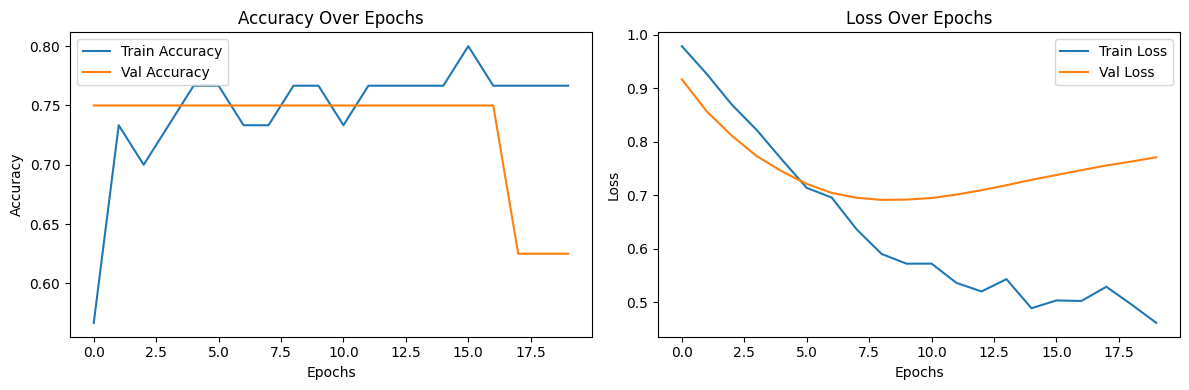

In [46]:
#Step 11: Visualize Training History
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [48]:
#Step 12: Predict and Analyze
from sklearn.metrics import classification_report

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
# Use the mapped test labels (0, 1, 2) as the true labels
y_true = y_test_mapped

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.71      0.83      0.77         6

    accuracy                           0.62         8
   macro avg       0.36      0.42      0.38         8
weighted avg       0.54      0.62      0.58         8



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.71      0.83      0.77         6

    accuracy                           0.62         8
   macro avg       0.36      0.42      0.38         8
weighted avg       0.54      0.62      0.58         8



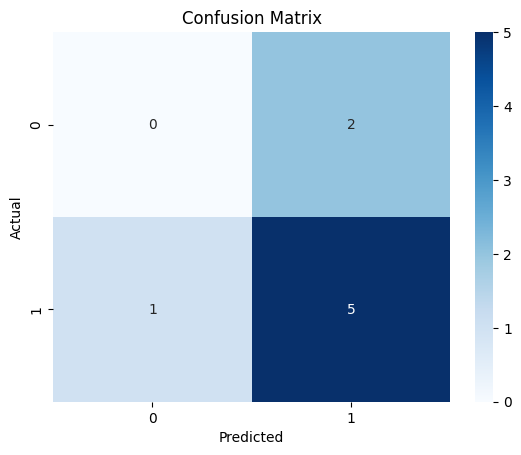

In [50]:
# Predict on test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
# Use the mapped test labels (0, 1, 2) as the true labels
y_true = y_test_mapped


# Print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

# Confusion matrix plot
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()